In [ ]:
import os
import json
import tarfile

# 1️⃣ Extract dataset
tar_path = "/content/vehicle-dataset-for-yolo-DatasetNinja.tar"
extract_path = "/content/vehicle1"

os.makedirs(extract_path, exist_ok=True)

with tarfile.open(tar_path) as tar:
    tar.extractall(path=extract_path)

print("✅ Extraction complete!")

# 2️⃣ Rename folders to YOLO standard
# TRAIN
os.rename("/content/vehicle1/train/ann", "/content/vehicle1/train/labels")
os.rename("/content/vehicle1/train/img", "/content/vehicle1/train/images")

# VALID
os.rename("/content/vehicle1/valid/ann", "/content/vehicle1/valid/labels")
os.rename("/content/vehicle1/valid/img", "/content/vehicle1/valid/images")

# 3️⃣ Check number of images and labels
img_folder = "/content/vehicle1/train/images"
lbl_folder = "/content/vehicle1/train/labels"

num_images = len([f for f in os.listdir(img_folder) if f.endswith(".jpg")])
num_labels = len([f for f in os.listdir(lbl_folder) if f.endswith(".json")])

print(f"Images: {num_images}")
print(f"JSON Labels: {num_labels}")

# 4️⃣ Class mapping
class_map = {
    "car": 0,
    "bus": 1,
    "truck": 2,
    "van": 3,
    "motorcycle": 4,
    "bicycle": 5,
    "auto": 6
}

# 5️⃣ Convert JSON labels to YOLO TXT
def convert_json_to_yolo(json_path, output_txt):
    with open(json_path) as f:
        data = json.load(f)

    img_w = data["size"]["width"]
    img_h = data["size"]["height"]

    yolo_lines = []

    for obj in data["objects"]:
        cls = obj["classTitle"]
        if cls not in class_map:
            continue

        class_id = class_map[cls]
        (x1, y1), (x2, y2) = obj["points"]["exterior"]

        # YOLO normalized format
        xc = ((x1 + x2) / 2) / img_w
        yc = ((y1 + y2) / 2) / img_h
        w = abs(x2 - x1) / img_w
        h = abs(y2 - y1) / img_h

        yolo_lines.append(f"{class_id} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}")

    if yolo_lines:
        with open(output_txt, "w") as f:
            f.write("\n".join(yolo_lines))

# 6️⃣ Process all train and valid labels
for split in ["train", "valid"]:
    img_dir = os.path.join(extract_path, split, "images")
    lbl_dir = os.path.join(extract_path, split, "labels")

    for file in os.listdir(lbl_dir):
        if file.endswith(".json"):
            img_name = file.replace(".json", "")
            json_path = os.path.join(lbl_dir, file)
            txt_path = os.path.join(lbl_dir, img_name.replace(".jpg", ".txt"))

            convert_json_to_yolo(json_path, txt_path)

print("✅ JSON to YOLO TXT conversion done for all train and valid labels!")


/tmp/ipython-input-2125598280.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


✅ Extraction complete!
Images: 820
JSON Labels: 2100
✅ JSON to YOLO TXT conversion done for all train and valid labels!


In [ ]:
!ls /content/vehicle1/train/labels | head
!cat /content/vehicle1/train/labels/*.txt | head



00043_GMC Savana Van 2012.jpg.json
00043_GMC Savana Van 2012.txt
00077.jpg.json
00077.txt
00116.jpg.json
00116.txt
00175_Ford E-Series Wagon Van 2012.jpg.json
00175_Ford E-Series Wagon Van 2012.txt
00241.jpg.json
00241.txt
3 0.498322 0.501199 0.973154 0.7673860 0.496059 0.518579 0.972410 0.8810960 0.504453 0.526423 0.678117 0.5691063 0.503125 0.576923 0.846250 0.7485930 0.525625 0.546382 0.873750 0.5992580 0.501465 0.574219 0.872070 0.7734383 0.504883 0.516276 0.923828 0.7643233 0.460938 0.544583 0.465625 0.5475000 0.499091 0.583562 0.867273 0.6739730 0.495536 0.498403 0.719643 0.5495210 0.495455 0.466019 0.863636 0.6844663 0.487942 0.542574 0.901929 0.8000000 0.530000 0.561667 0.757500 0.5166673 0.510938 0.491841 0.925000 0.8857810 0.495000 0.501667 0.962500 0.7266673 0.498750 0.590000 0.842500 0.7333333 0.558065 0.519330 0.509677 0.5489693 0.506250 0.505208 0.934375 0.6562503 0.512000 0.466667 0.712000 0.800000
0 0.961000 0.434667 0.074000 0.1066670 0.503234 0.648342 0.990944 0.50436

In [ ]:
import yaml

data_yaml = {
    'nc': 7,
    'names': ["car", "bus", "truck", "van", "motorcycle", "bicycle", "auto"],
    'train': '/content/vehicle1/train/images',
    'val': '/content/vehicle1/valid/images'
}

yaml_path = "/content/vehicle1/data.yaml"

with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f)

print(f"✅ data.yaml created at {yaml_path}")


✅ data.yaml created at /content/vehicle1/data.yaml


Image: NZPSC7WAZBR6.jpg


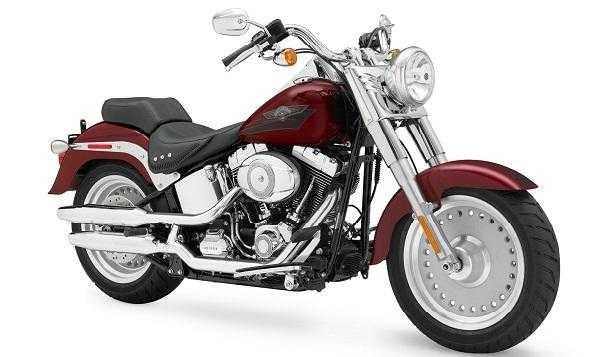

Label file(s): ['NZPSC7WAZBR6.jpg.json']
{
    "description": "",
    "tags": [],
    "size": {
        "height": 357,
        "width": 608
    },
    "objects": [
        {
            "id": 74867584,
            "classId": 6488143,
            "description": "",
            "geometryType": "rectangle",
            "labelerLogin": "inbox@datasetninja.com",
            "createdAt": "2023-10-18T11:02:43.220Z",
            "updatedAt": "2023-10-18T11:02:43.220Z",
            "tags": [],
            "classTitle": "motorbike",
            "points": {
                "exterior": [
                    [
                        46,
                        6
                    ],
                    [
                        561,
                        353
                    ]
                ],
                "interior": []
            }
        }
    ]
}
Image: truck100.jpeg


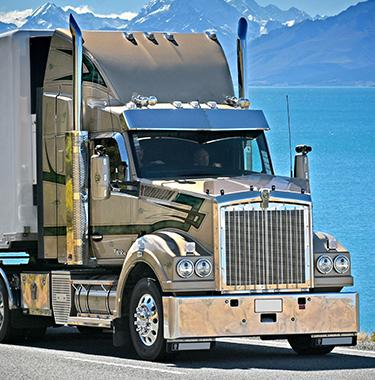

Label file(s): ['truck100.jpeg.json', 'truck100.jpeg']
{
    "description": "",
    "tags": [],
    "size": {
        "height": 380,
        "width": 375
    },
    "objects": [
        {
            "id": 74868112,
            "classId": 6488142,
            "description": "",
            "geometryType": "rectangle",
            "labelerLogin": "inbox@datasetninja.com",
            "createdAt": "2023-10-18T11:03:41.158Z",
            "updatedAt": "2023-10-18T11:03:41.158Z",
            "tags": [],
            "classTitle": "truck",
            "points": {
                "exterior": [
                    [
                        1,
                        13
                    ],
                    [
                        358,
                        359
                    ]
                ],
                "interior": []
            }
        }
    ]
}
Image: 1302193159_f231889752_n.jpg


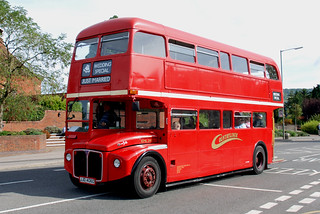

Label file(s): ['1302193159_f231889752_n.txt', '1302193159_f231889752_n.jpg.json']
1 0.542188 0.497664 0.690625 0.845794
Image: truck384.jpeg


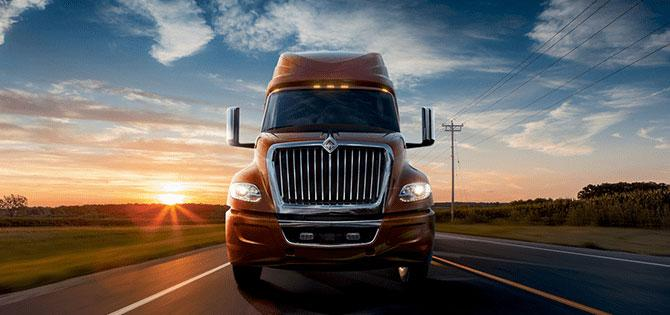

Label file(s): ['truck384.jpeg.json', 'truck384.jpeg']
{
    "description": "",
    "tags": [],
    "size": {
        "height": 315,
        "width": 670
    },
    "objects": [
        {
            "id": 74868194,
            "classId": 6488142,
            "description": "",
            "geometryType": "rectangle",
            "labelerLogin": "inbox@datasetninja.com",
            "createdAt": "2023-10-18T11:03:51.152Z",
            "updatedAt": "2023-10-18T11:03:51.152Z",
            "tags": [],
            "classTitle": "truck",
            "points": {
                "exterior": [
                    [
                        226,
                        49
                    ],
                    [
                        436,
                        288
                    ]
                ],
                "interior": []
            }
        }
    ]
}
Image: 4333859819_8b46630b6f_w.jpg


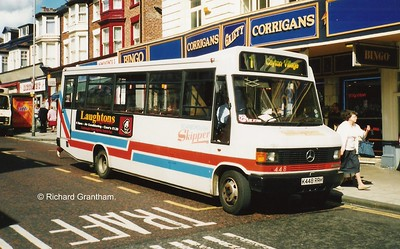

Label file(s): ['4333859819_8b46630b6f_w.txt', '4333859819_8b46630b6f_w.jpg.json']
1 0.498750 0.522088 0.722500 0.682731


In [ ]:
import random
import os
from PIL import Image
from IPython.display import display

# Paths
img_folder = "/content/vehicle1/train/images"
lbl_folder = "/content/vehicle1/train/labels"

# Sample 5 random images
sample_imgs = random.sample(os.listdir(img_folder), 5)

for img_name in sample_imgs:
    print("Image:", img_name)
    display(Image.open(os.path.join(img_folder, img_name)))

    # Get base name without extension
    base_name = os.path.splitext(img_name)[0]

    # Find matching label file (any extension)
    label_files = [f for f in os.listdir(lbl_folder) if f.startswith(base_name)]

    if label_files:
        print("Label file(s):", label_files)
        # Print first label file content
        with open(os.path.join(lbl_folder, label_files[0])) as f:
            print(f.read())
    else:
        print("No label file found")


In [ ]:
# Check files in label folder
ann_files = os.listdir(lbl_folder)
print("Number of label files:", len(ann_files))
print("Some label files:", ann_files[:5])


Number of label files: 3549
Some label files: ['car16.jpg.json', 'threewheel315.jpeg.json', 'car244.jpg.json', 'srilankatruck191.jpeg', '202.jpg.json']


In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00


In [ ]:

# Import the train function
from ultralytics import YOLO

# Path to the dataset YAML
data_yaml = "/content/vehicle1/data.yaml"

# Create the model instance (YOLOv8n - nano)
model = YOLO("yolov8n.pt")  # you can change to yolov8s.pt, yolov8m.pt etc.

# Train the model
model.train(
    data=data_yaml,  # path to your dataset YAML
    epochs=100,       # number of epochs
    imgsz=640,       # image size
    batch=16,     # batch size, adjust based on GPU/CPU
    patience=30,          # early stop if no improvement
    augment=True ,
    project="vehicle_training",  # folder where results will be saved
    name="yolov8_vehicle",       # subfolder name
    exist_ok=True,  # overwrite if folder exists
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.242 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c95ee938ce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# Evaluate the model
metrics = model.val()  # This runs validation
print(metrics)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1622.4±724.5 MB/s, size: 89.8 KB)
val: Scanning /content/vehicle1/valid/labels.cache... 431 images, 469 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 900/900 1.7Mit/s 0.0s
val: /content/vehicle1/valid/images/car55.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 57/57 6.0it/s 9.6s
                   all        900        498      0.904      0.883      0.901      0.852
                   car        179        198      0.956      0.929      0.966      0.934
                   bus        162        185      0.984      0.972      0.993      0.963
                 truck         10         13      0.908      0.757      0.772      0.665
                   van         96        102      0.768  

In [ ]:
# Path to test image
test_img = "/content/vehicle1/valid/images/car55.jpg"

# Run inference
results = model.predict(source=test_img, conf=0.5, save=True)

# Display results
results



image 1/1 /content/vehicle1/valid/images/car55.jpg: 416x640 1 car, 527.8ms
Speed: 35.1ms preprocess, 527.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'car', 1: 'bus', 2: 'truck', 3: 'van', 4: 'motorcycle', 5: 'bicycle', 6: 'auto'}
 obb: None
 orig_img: array([[[228, 216, 212],
         [228, 216, 212],
         [228, 216, 212],
         ...,
         [ 51,  81,  70],
         [ 57,  87,  76],
         [ 64,  96,  85]],
 
        [[228, 216, 212],
         [228, 216, 212],
         [228, 216, 212],
         ...,
         [ 51,  85,  74],
         [ 61,  93,  82],
         [ 68, 102,  91]],
 
        [[228, 216, 212],
         [228, 216, 212],
         [229, 217, 213],
         ...,
         [ 54,  94,  82],
         [ 62, 102,  90],
         [ 70, 110,  98]],
 
        ...,
 
        [[113, 125, 131],
         [107, 119, 125],
         [105, 115, 122],
         ...,
         [133, 136, 140],
         [134, 137, 141],
         [128, 131, 135]],
 
        [[103, 117, 123],
         [101